In [1]:
from astropy.table import Table
import pylab
import bilby
import numpy as np
import healpy as hp

In [2]:
catalog = Table.read('data/catalog_fullsky_zsm1.fits.gz')

In [3]:
ra = catalog['RA'].data
dec = catalog['DEC'].data
z = catalog['REDSHIFT'].data

mask = z<0.2

ra = ra[mask] * np.pi / 180
dec = dec[mask] * np.pi / 180
z = z[mask]
dl = bilby.gw.conversion.redshift_to_luminosity_distance(z)

# bilby coordinates (ra, dec) -> healpix coordinates (pi/2 - dec, ra)
theta = 0.5 * np.pi - dec
phi = ra.copy()

In [4]:
NSIDE = 2**11
NPIX = hp.nside2npix(NSIDE)
hp_map = np.zeros(NPIX)

In [8]:
for i in range(len(z)):
    hp_map[hp.query_disc(nside=NSIDE, vec=hp.ang2vec(theta[i], phi[i]), radius=0.001)] += 1
    if not i % 1000:
        print("\r{}".format(np.round(100*(i+1)/len(z), 1)), end="%")

print("\r 100%")

hp_map = hp.sphtfunc.smoothing(hp_map, sigma=0.001)
hp_map[hp_map<1e-5] = 0
hp_map = hp_map/np.sum(hp_map)

 100%


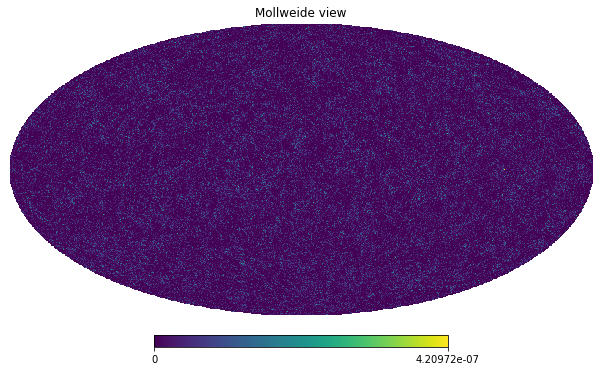

In [9]:
hp.mollview(hp_map)